In [1]:
import Pkg; Pkg.activate("..")
using Revise
using TEQUILA
using Equilibrium
using MillerExtendedHarmonic
using Plots
import Optim
using StaticArrays
using BenchmarkTools

  Activating project at `~/.julia/dev/TEQUILA`


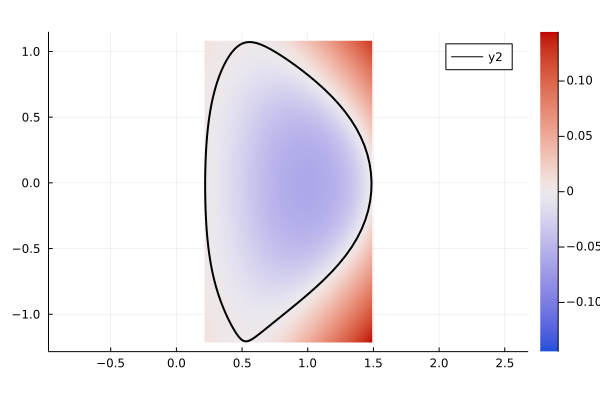

In [2]:
# Load a gEQDSK, which has been produced by CHEASE and has an MXH boundary

Ψ, bnd = read_geqdsk("../sample/g_chease_mxh", clockwise_phi=false)

# The boundary points used in CHEASE, which came from an MXH surface
Rbnd = [1.4835178156219313, 1.4751077671753525, 1.4602394328985497, 1.4388380419389455, 1.4108807338529168, 1.3764483277806405, 1.3357804753627627, 1.2893244149041314, 1.2377668623272875, 1.1820398871874687, 1.1232951972509257, 1.0628467019418477, 1.0020874242222966, 0.9423921857519185, 0.8850204560024655, 0.8310334333940519, 0.7812359419834862, 0.7361481974776741, 0.6960065889264038, 0.6607879267949847, 0.6302491076665837, 0.6039739971357191, 0.581420982624028, 0.5619671697773423, 0.544947663954185, 0.5296901416465357, 0.515545712237456, 0.5019169852256711, 0.48828360010109495, 0.4742246220125431, 0.4594364798717472, 0.44374473391905406, 0.4271079981748529, 0.409612810526308, 0.39145907858607404, 0.37293682088983754, 0.35439610416262285, 0.3362131315257383, 0.3187561275885247, 0.30235480008510673, 0.28727665162877747, 0.27371234360083185, 0.26177090083856946, 0.2514841006517634, 0.24281821459282615, 0.23569057230552082, 0.22998825597144357, 0.22558653443943544, 0.22236523847997325, 0.22022196524730508, 0.21908161380297597, 0.21890219366643027, 0.21967708989569368, 0.22143404980091086, 0.22423115491890488, 0.22815004304607933, 0.23328671710624138, 0.2397404522109191, 0.24760157626101642, 0.25693919736484827, 0.26779019905703894, 0.2801509311967597, 0.29397291970282646, 0.30916357450299925, 0.3255923216264419, 0.3431019063582449, 0.36152392991750903, 0.380697117889242, 0.4004864731636038, 0.42080138642476533, 0.44161095015067714, 0.4629550828808725, 0.48495052398367755, 0.5077912058015006, 0.531742869974298, 0.5571320250991906, 0.5843294476842027, 0.6137284604716512, 0.6457182765253558, 0.6806528923241719, 0.7188164573588416, 0.7603867949570597, 0.8053997480153771, 0.8537180834199077, 0.9050094850040493, 0.9587383009186167, 1.0141748445222794, 1.070424043788906, 1.1264722926505406, 1.181248040399161, 1.2336887703414552, 1.2828053785623097, 1.3277351004668447, 1.3677760954530462, 1.4024001249678741, 1.4312436339749626, 1.4540810908128134, 1.4707869822179531, 1.4812940883304169, 1.4855556251025055, 1.4835178156219313]
Zbnd = [-0.06745063500000004, -0.1390018250113284, -0.21027063516431138, -0.2809758000248973, -0.35083827860949884, -0.41958235563227286, -0.4869367296273919, -0.5526355836519838, -0.6164196343441647, -0.6780371551960134, -0.7372449700030954, -0.7938094125698445, -0.8475072488832859, -0.898126558115698, -0.945467568979303, -0.9893434481322729, -1.0295810375245735, -1.0660215377736795, -1.0985211348731885, -1.1269515677610018, -1.1512006345071417, -1.1711726351235048, -1.1867887492479983, -1.1979873472124964, -1.2047242332669859, -1.2069728200000003, -1.2047242332669859, -1.1979873472124964, -1.1867887492479983, -1.1711726351235052, -1.1512006345071417, -1.1269515677610022, -1.0985211348731885, -1.0660215377736795, -1.0295810375245738, -0.9893434481322729, -0.945467568979303, -0.8981265581156979, -0.8475072488832861, -0.7938094125698448, -0.7372449700030955, -0.6780371551960134, -0.6164196343441646, -0.5526355836519841, -0.48693672962739215, -0.419582355632273, -0.3508382786094989, -0.2809758000248973, -0.2102706351643117, -0.13900182501132863, -0.06745063500000018, 0.004100555011328291, 0.07536936516431134, 0.14607453002489693, 0.21593700860949855, 0.2846810856322726, 0.3520354596273918, 0.4177343136519837, 0.4815183643441642, 0.5431358851960131, 0.6023437000030951, 0.6589081425698444, 0.7126059788832859, 0.7632252881156976, 0.810566298979303, 0.8544421781322727, 0.8946797675245731, 0.9311202677736794, 0.9636198648731881, 0.9920502977610021, 1.0162993645071414, 1.036271365123505, 1.0518874792479984, 1.0630860772124961, 1.0698229632669856, 1.07207155, 1.0698229632669856, 1.0630860772124961, 1.0518874792479984, 1.036271365123505, 1.0162993645071419, 0.9920502977610023, 0.9636198648731883, 0.9311202677736796, 0.8946797675245733, 0.8544421781322731, 0.8105662989793033, 0.7632252881156979, 0.7126059788832861, 0.6589081425698444, 0.6023437000030956, 0.5431358851960139, 0.4815183643441646, 0.41773431365198405, 0.35203545962739174, 0.284681085632273, 0.21593700860949944, 0.14607453002489734, 0.07536936516431175, 0.004100555011328194, -0.06745063499999976]

# Plot the equilibrium flux
Rs = range(minimum(Rbnd), maximum(Rbnd), 129)
Zs = range(minimum(Zbnd), maximum(Zbnd), 129)
P = [Ψ(r,z) for z in Zs, r in Rs]
cmax = maximum(abs.(P))

p = heatmap(Rs, Zs, P, aspect_ratio=:equal, c=:diverging, clim=(-cmax,cmax))
plot!(Rbnd, Zbnd, color=:black, lw=2)

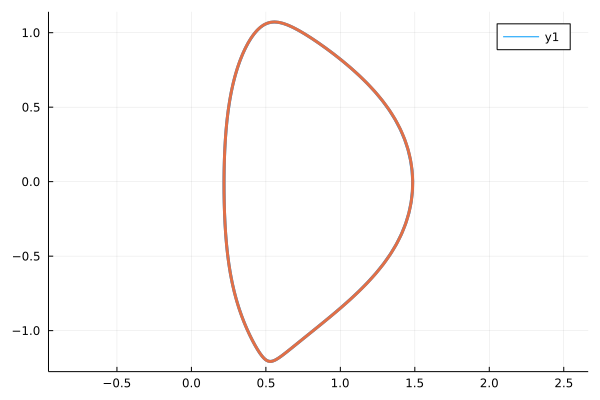

In [3]:
# Double check that the MXH fit to the boundary is "exact"
bnd = MXH(Rbnd, Zbnd, 5)
p = plot(Rbnd, Zbnd, lw=3, aspect_ratio=:equal)
plot!(bnd, adaptive_grid_N=10000, lw=3)
display(p)

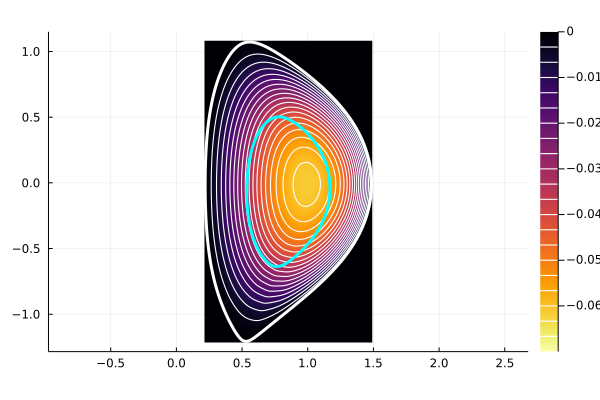

In [4]:
# Compare the equilibrium flux surfaces (white)
#   to initial, concentric flux surfaces (red)
P = [Ψ(r,z) for z in Zs, r in Rs]
p = plot(aspect_ratio=:equal)
heatmap!(p, Rs, Zs, P, clim=(-0.07,0), c=cgrad(:inferno, rev=true))
contour!(p, Rs, Zs, P, c=:white, lw=1.1, levels=20)
plot!(concentric_surface(0.5, bnd), c=:cyan, lw=3)
plot!(bnd, c=:white, lw=3)
display(p)

In [5]:
"""
Absolute difference between Ψ and level around the surface flat (a flattened mxh)
"""
function residual_MXH(flat::AbstractVector{<:Real}, level::Real, Ψ; norm=1.0)
    a = flat[1] * flat[3]
    b = a * flat[4]
    Z0 = flat[2]
    
    # 0 and π
    R1 = R_MXH(0.0, flat; a)
    R2 = R_MXH(  π, flat; a)
    res  = (Ψ(R1, Z0) - level)^2 
    res += (Ψ(R2, Z0) - level)^2

    # -π/2 and π/2
    halfpi = 0.5*π
    R1 = R_MXH( halfpi, flat; a)
    Z1 = Z0 - b
    R2 = R_MXH(-halfpi, flat; a)
    Z2 = Z0 + b
    res += (Ψ(R1, Z1) - level)^2 
    res += (Ψ(R2, Z2) - level)^2
    
    M = (length(flat) - 5) ÷ 2
    
    θ1 = range(0, halfpi, length=M+1)
    θ2 = π .- θ1
    
      for k in 2:M
        
        # lower half
        z  = Z_MXH(θ1[k], flat; a)
        
        r = R_MXH(θ1[k], flat; a)
        res += (Ψ(r, z) - level)^2
        
        r = R_MXH(θ2[k], flat; a)
        res += (Ψ(r, z) - level)^2
        
        #upper half
        z = 2Z0 - z
        
        r = R_MXH(-θ1[k], flat; a)
        res += (Ψ(r, z) - level)^2
        
        r = R_MXH(-θ2[k], flat; a)
        res += (Ψ(r, z) - level)^2
    end
    
    return res / norm^2
end

"""
Fit one surface
"""
function MXH_surface(level::Real, mxh_init::MXH, Ψ,
                     x0::AbstractVector{<:Real}, lower::AbstractVector{<:Real}, upper::AbstractVector{<:Real};
                     inner_optimizer::Optim.FirstOrderOptimizer=Optim.ConjugateGradient())

    # Initial guess
    a0 = mxh_init.R0 * mxh_init.ϵ
    b0 = a0 * mxh_init.κ

    #ρfac = ρ[k] / ρ[k+1]

    flat_coeffs!(x0, mxh_init)
    #x0[3] *=  ρfac
    #@views x0[6:end] .*=  ρfac

    # Bounding box
    # Fourier coefficients ∈ [-π/2, π/2]
    lower[1:4] .= (mxh_init.R0 - a0, mxh_init.Z0 - b0, 0.0, 0.0)
    lower[5:end] .= -0.5*π
    upper[1:4] .= (mxh_init.R0 + a0, mxh_init.Z0 + b0, 2 * mxh_init.ϵ, 2 * mxh_init.κ)
    upper[5:end] .= 0.5*π
    
    algo = Optim.Fminbox(inner_optimizer)
    options = Optim.Options()
    f = x -> residual_MXH(x, level, Ψ)
    res = Optim.optimize(f, lower, upper, x0, algo, options; autodiff=:forward)

    !Optim.converged(res) && error("Surface $k failed to converge")
    return MXH(Optim.minimizer(res))
end

"""
Fit all surfaces for each ρ (using ψnorm=ρ^2 approximation)

"""
function loop_surfaces!(surfaces::Vector{<:MXH}, bnd::MXH, levels::AbstractVector{<:Real}, Ψ,
                        x0::AbstractVector{<:Real}, lower::AbstractVector{<:Real}, upper::AbstractVector{<:Real};
                        inner_optimizer::Optim.FirstOrderOptimizer=Optim.ConjugateGradient())
    for k in reverse(eachindex(surfaces))
        k == N ? surfaces[k] = deepcopy(bnd) : surfaces[k] = MXH_surface(levels[k], surfaces[k+1], Ψ, x0, lower, upper; inner_optimizer)
    end
end
function MXH_surfaces(levels::AbstractVector{<:Real}, Ψ, bnd::MXH;
                      inner_optimizer::Optim.FirstOrderOptimizer=Optim.ConjugateGradient())

    N = length(levels)

    surfaces = Vector{typeof(bnd)}(undef, N)
    
    # Allocate initial guess and bounds
    x0 = flat_coeffs(bnd)
    lower = zero(x0)
    upper = zero(x0)
    
    loop_surfaces!(surfaces, bnd, levels, Ψ, x0, lower, upper; inner_optimizer)
    #for k in reverse(2:N)
    #    k == N ? surfaces[k] = deepcopy(bnd) : surfaces[k] = MXH_surface(levels[k], surfaces[k+1], Ψ, x0, lower, upper; inner_optimizer)
    #end
    
    # Extrapolate or set to zero on-axis
    ρ2 = sqrt((levels[2]-levels[1])/(levels[end]-levels[1]))
    ρ3 = sqrt((levels[3]-levels[1])/(levels[end]-levels[1]))
    h = 1.0 / (ρ3 - ρ2)
    x0 .= 0
    x0[1] = h .* (surfaces[2].R0 .* ρ3 .- surfaces[3].R0 .* ρ2)
    x0[2] = h .* (surfaces[2].Z0 .* ρ3 .- surfaces[3].Z0 .* ρ2)
    x0[4] = h .* (surfaces[2].κ  .* ρ3 .- surfaces[3].κ  .* ρ2)
    x0[5] = h .* (surfaces[2].c0 .* ρ3 .- surfaces[3].c0 .* ρ2)
    surfaces[1] = MXH(x0)
    return surfaces
end

function MXH_surfaces(levels::AbstractVector{<:Real}, Ψ, mxh_init::AbstractVector{<:MXH};
                      inner_optimizer::Optim.FirstOrderOptimizer=Optim.ConjugateGradient())

    N = length(levels)

    surfaces = deepcopy(mxh_init)
    
    # Allocate initial guess and bounds
    x0 = flat_coeffs(mxh_init[1])
    lower = zero(x0)
    upper = zero(x0)
    
    for (k, lvl) in enumerate(levels)
        (k == N || k ==1) && continue
        surfaces[k] = MXH_surface(levels[k], surfaces[k], Ψ, x0, lower, upper; inner_optimizer)
    end
    
    # Extrapolate or set to zero on-axis
    ρ2 = sqrt((levels[2]-levels[1])/(levels[end]-levels[1]))
    ρ3 = sqrt((levels[3]-levels[1])/(levels[end]-levels[1]))
    h = 1.0 / (ρ3 - ρ2)
    x0 .= 0
    x0[1] = h .* (surfaces[2].R0 .* ρ3 .- surfaces[3].R0 .* ρ2)
    x0[2] = h .* (surfaces[2].Z0 .* ρ3 .- surfaces[3].Z0 .* ρ2)
    x0[4] = h .* (surfaces[2].κ  .* ρ3 .- surfaces[3].κ  .* ρ2)
    x0[5] = h .* (surfaces[2].c0 .* ρ3 .- surfaces[3].c0 .* ρ2)
    surfaces[1] = MXH(x0)
    return surfaces
end;

In [6]:
# Resolution
N = 21

# First find axis and psi on-axis
psign = sign(Ψ(bnd.R0, bnd.Z0))

f(x) = -psign * Ψ(x[1], x[2])
x0 = [bnd.R0, bnd.Z0]
S = Optim.optimize(f, [bnd.R0, bnd.Z0], Optim.LBFGS(); autodiff = :forward)
R0, Z0 = Optim.minimizer(S)
Ψ0 = -psign * Optim.minimum(S);

Here's if we have to start from only the outer surface and march inward
  0.086036 seconds (78.38 k allocations: 3.717 MiB)
Here's if we start from concentric surfaces (FAILS)
  1.129290 seconds (449.99 k allocations: 19.708 MiB, 47.68% gc time)
But if we start from nearby surfaces, we're good
  568.005 μs (3165 allocations: 240.72 KiB)


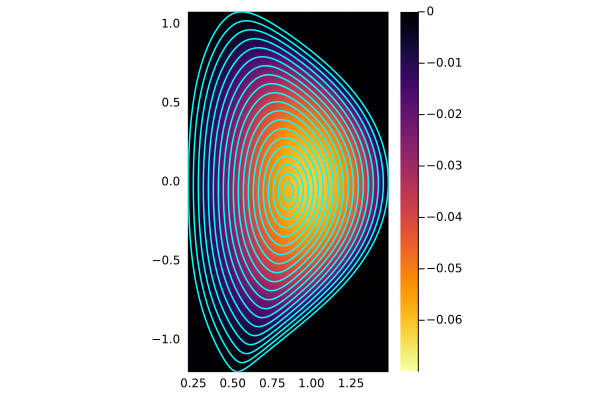

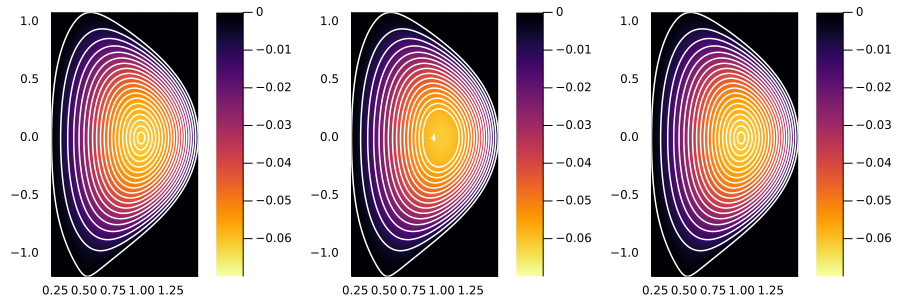

In [9]:
# define flux values to solve on
N = 21
ρ = range(0, 1, N)
levels = Ψ0 .* (1.0 .- ρ.^2) # approximation for now

# Fit all surfaces at Ψ = levels
S1 = MXH_surfaces(levels, Ψ, bnd, inner_optimizer=Optim.ConjugateGradient())

#Time it
println("Here's if we have to start from only the outer surface and march inward")
@time MXH_surfaces(levels, Ψ, bnd, inner_optimizer=Optim.ConjugateGradient())

println("Here's if we start from concentric surfaces (FAILS)")
CS = concentric_surface.(ρ, Ref(bnd))
S2 = MXH_surfaces(levels, Ψ, CS, inner_optimizer=Optim.ConjugateGradient())
@time MXH_surfaces(levels, Ψ, CS, inner_optimizer=Optim.ConjugateGradient())

println("But if we start from nearby surfaces, we're good")
CS = concentric_surface.(ρ, Ref(bnd))
S3 = MXH_surfaces(levels, Ψ, S1, inner_optimizer=Optim.ConjugateGradient())
@btime MXH_surfaces(levels, Ψ, S1, inner_optimizer=Optim.ConjugateGradient())

# Plot new surfaces
P = [Ψ(r,z) for z in Zs, r in Rs]
p0 = plot(aspect_ratio=:equal, xrange=(minimum(Rs), maximum(Rs)), yrange=(minimum(Zs), maximum(Zs)))
p1 = plot(aspect_ratio=:equal, xrange=(minimum(Rs), maximum(Rs)), yrange=(minimum(Zs), maximum(Zs)))
p2 = plot(aspect_ratio=:equal, xrange=(minimum(Rs), maximum(Rs)), yrange=(minimum(Zs), maximum(Zs)))
p3 = plot(aspect_ratio=:equal, xrange=(minimum(Rs), maximum(Rs)), yrange=(minimum(Zs), maximum(Zs)))
heatmap!(p0, Rs, Zs, P, clim=(-0.07,0), c=cgrad(:inferno, rev=true))
heatmap!(p1, Rs, Zs, P, clim=(-0.07,0), c=cgrad(:inferno, rev=true))
heatmap!(p2, Rs, Zs, P, clim=(-0.07,0), c=cgrad(:inferno, rev=true))
heatmap!(p3, Rs, Zs, P, clim=(-0.07,0), c=cgrad(:inferno, rev=true))
for k in eachindex(CS)
    k==1 && continue
    plot!(p0, CS[k], c=:cyan, lw=1.5)
end
display(p0)
for k in eachindex(CS)
    k==1 && continue
    #plot!(p1, CS[k], c=:black, lw=0.5)
    plot!(p1, S1[k], c=:white, lw=1.5)
    
    #plot!(p2, CS[k], c=:black, lw=0.5)
    plot!(p2, S2[k], c=:white, lw=1.5)
    
    #plot!(p3, CS[k], c=:black, lw=0.5)
    plot!(p3, S3[k], c=:white, lw=1.5)
end
plot(p1,p2,p3, layout=(1,3), size = (900, 300))

Ψ(ρ,θ) before fitting


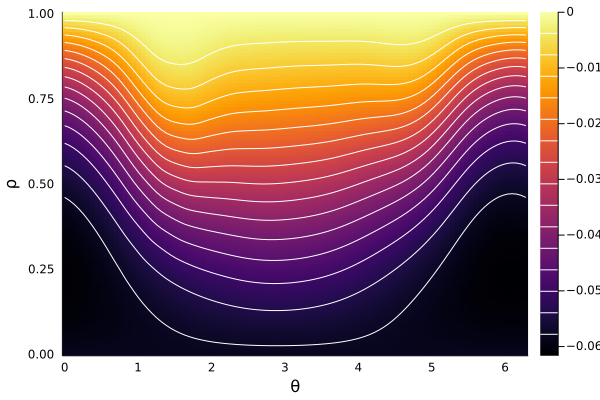

Ψ(ρ,θ) after fitting


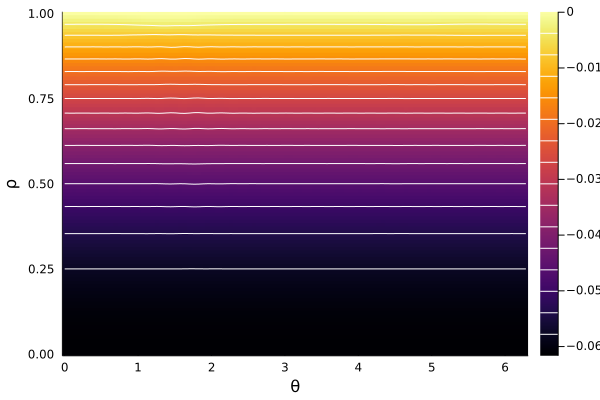

In [8]:
M = 21 # number of Fourier modes to decompose Ψ on a surface, not the number in mxh

println("Ψ(ρ,θ) before fitting")
shot = Shot(N, M, bnd, Ψ)
display(plot_shot(shot, :ρθ))

println("Ψ(ρ,θ) after fitting")
shot = Shot(N, M, ρ, S1, Ψ)
display(plot_shot(shot, :ρθ))